In [1]:
import keras
import matplotlib.pyplot as plt
import sys
import argparse
import os
import tensorflow as tf
from keras.models import Model
from keras.models import load_model
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam, SGD, rmsprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
def train():
    global model_name_to_save
    model_name_to_save = "Model2_" + str(model_name) + "_" + str(learning_rate) + "_" + str(batch_size) + "_" + str(epochs)

    # Provide path names for data and folder names for classes
    train_batches = ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory('../misc/data/images/train', class_mode = 'categorical', classes = ['Gesture_0', 'Gesture_1', 'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7', 'Gesture_8', 'Gesture_9'], batch_size = batch_size, target_size = (224, 224), shuffle=True)
    validation_batches = ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory('../misc/data/images/validate', class_mode = 'categorical', classes = ['Gesture_0', 'Gesture_1', 'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7', 'Gesture_8', 'Gesture_9'], batch_size = batch_size, target_size = (224, 224), shuffle=True)

    # CNN architectures
    if model_name == 'ResNet152':
        model = keras.applications.ResNet152(include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'InceptionV3':
        model = keras.applications.InceptionV3(include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'NASNetLarge':
        model = keras.applications.NASNetLarge(include_top=False, input_shape=(331, 331, 3))
    elif model_name == 'VGG16':
        model = keras.applications.vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
    else:
        model = keras.applications.resnet50.ResNet50(include_top=False, input_shape=(224, 224, 3))
    print(model)
    
    # Add additional layers
    flat1 = Flatten(input_shape = model.output_shape[1:])(model.layers[-1].output)
    dense1 = Dense(256, activation = 'relu')(flat1)
    output = Dense(10, activation = 'softmax')(dense1)

    # Define new model
    model = Model(inputs = model.inputs, outputs = output)
    #model.summary()

    # lr comes from cmd line args
    model.compile(SGD(lr = learning_rate, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # fit model
    history = model.fit_generator(train_batches, steps_per_epoch = len(train_batches), validation_data = validation_batches, validation_steps = len(validation_batches), epochs = epochs, verbose = 0)

    # validation
    acc = model.evaluate_generator(validation_batches, steps = len(validation_batches), verbose = 0)
    print('Loss, Accuracy: ' + str(acc))

    # save model
    model.save(model_name_to_save)

In [3]:
def test():
    # Provide test folder and classes
    test_batches = ImageDataGenerator(rescale = 1.0/255.0).flow_from_directory('../misc/data/images/test', class_mode = 'categorical', classes = ['Gesture_0', 'Gesture_1', 'Gesture_2', 'Gesture_3', 'Gesture_4', 'Gesture_5', 'Gesture_6', 'Gesture_7', 'Gesture_8', 'Gesture_9'], batch_size = batch_size, target_size = (224, 224), shuffle = True)

    # load model
    model = load_model(model_name_to_save)
    model.compile(SGD(lr = learning_rate, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # testing
    acc = model.evaluate_generator(test_batches, steps = len(test_batches), verbose = 0)
    print('Loss, Accuracy: ' + str(acc))

We have defined train and test functions in the above cells.

Now we can run the code for different values of hyperparameters.

model_name could be one of "Resnet50", "ResNet152", "VGG16", "InceptionV3".

We tested with the below hyperparameters.

We found learning_rate=0.0001 gives good accuracy with VGG16, InceptionV3 and learning_rate=0.01 with ResNet models.

Disclaimer: Training can can forever on this jupyter notebook. We actually used GPUs to do this training. We highly recommend cloning the code from the repository and do the testing. However, we recorded the losses, accuracy values while we trained on GPUs and this will follow in the next to next cell.

In [4]:
model_name="ResNet52"
batch_size=4
learning_rate=0.0001
epochs=20
train()
test()

Found 10000 images belonging to 10 classes.
Found 5794 images belonging to 10 classes.
Instructions for updating:
Colocations handled automatically by placer.


KeyboardInterrupt: 

Plotting curves using recorded values while training on GPUs.
Run one of the four cells with different models and then run the cell with plot code.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
num_epochs = 20
epochs = [i for i in range(num_epochs)]

In [14]:
model_name = "Resnet50"
losses = [1.6282 , 0.8395 , 0.8000 , 0.9548 , 0.5461 , 0.0466 , 0.0346 , 0.0244 , 0.0097 , 0.0069 , 0.0078 , 0.0082 , 0.0035 , 3.7100e-04, 5.0785e-05, 2.7006e-05, 4.1131e-05, 0.0027 , 0.0328 , 0.0064]
train_accuracy = [0.5369, 0.6957, 0.7231, 0.6840, 0.8228, 0.9865, 0.9919, 0.9945, 0.9978, 0.9983, 0.9978, 0.9982, 0.9996, 0.9999, 1.0000, 1.0000, 1.0000, 0.9997, 0.9935, 0.9988]
val_accuracy = [0.7318, 0.6902, 0.7598, 0.7972, 0.9325, 0.9493, 0.9242, 0.9555, 0.9622, 0.9762, 0.9308, 0.9503, 0.9589, 0.9638, 0.9632, 0.9638, 0.9598, 0.9755, 0.9474, 0.9691]

In [10]:
model_name = "Resnet152"
losses = [2.2295, 0.9715, 0.6088, 0.1791, 0.0998, 0.1086, 0.0215, 0.0317, 0.0131, 0.0074, 0.0076, 0.0115, 0.0451, 0.0980, 0.1007, 0.0144, 0.0239, 0.0070, 0.0118, 0.0179]
train_accuracy = [0.3560, 0.6505, 0.8057, 0.9471, 0.9706, 0.9768, 0.9933, 0.9928, 0.9964, 0.9980, 0.9975, 0.9967, 0.9891, 0.9817, 0.9803, 0.9956, 0.9952, 0.9974, 0.9974, 0.9958]
val_accuracy = [0.5468, 0.8200, 0.8017, 0.8157, 0.8683, 0.9111, 0.9812, 0.9567, 0.9812, 0.9304, 0.9436, 0.9810, 0.9691, 0.9135, 0.9915, 0.9898, 0.9781, 0.9936, 0.9924, 0.9881]

In [11]:
model_name = "VGG16"
losses = [0.0752, 1.6757e-04, 5.6403e-05, 3.6710e-05, 2.7170e-05, 2.1573e-05, 1.7804e-05, 1.5130e-05, 1.3139e-05, 1.1560e-05, 1.0353e-05, 9.3349e-06, 8.5009e-06, 7.7930e-06, 7.1938e-06, 6.6699e-06, 6.2349e-06, 5.8412e-06, 5.4913e-06, 5.1838e-06]
train_accuracy = [0.9763, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
val_accuracy = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]

In [12]:
model_name = "InceptionV3"
losses = [0.1373, 0.0081, 0.0055, 0.0018, 0.0035, 0.0014, 9.9093e-04, 0.0017, 4.5547e-04, 0.0011, 8.3966e-04, 0.0015, 4.2541e-04, 1.4254e-04, 6.6341e-04, 4.0510e-04, 1.3418e-04, 1.8700e-04, 1.4760e-04, 2.2420e-04]
train_accuracy = [0.9573, 0.9973, 0.9981, 0.9996, 0.9986, 0.9997, 0.9997, 0.9995, 0.9999, 0.9998, 0.9998, 0.9993, 1.0000, 1.0000, 0.9998, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000]
val_accuracy = [0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]

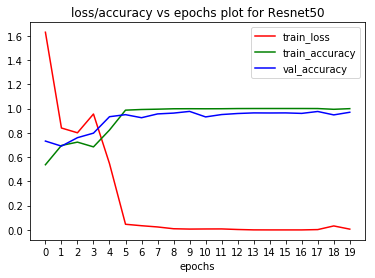

In [15]:
plt.plot(epochs, losses, 'r', label="train_loss")
plt.plot(epochs, train_accuracy, 'g', label="train_accuracy")
plt.plot(epochs, val_accuracy, 'b', label="val_accuracy")
plt.xlabel('epochs')
plt.xticks(epochs)
plt.legend(loc="left")
plt.title('loss/accuracy vs epochs plot for ' + model_name)
plt.show()